# Amazon Fine Food Reviews : Baseline

## Preparing the Data

In [1]:
!kaggle datasets download -d snap/amazon-fine-food-reviews

 99%|███████████████████████████████████████▋| 249M/251M [00:05<00:00, 45.5MB/s]
100%|████████████████████████████████████████| 251M/251M [00:05<00:00, 51.4MB/s]


In [2]:
!unzip amazon-fine-food-reviews.zip

Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('~/work/data/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df = df.loc[:, ['Text', 'Score']]
df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [8]:
def get_sentiment(value):
    if value > 3:
        return 1
    else:
        return 0

In [9]:
df['Sentiment'] = df['Score'].apply(get_sentiment)

In [10]:
df.head()

,Text,Score,Sentiment
0,I have bought several of the Vitality canned d...,5,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,0
2,This is a confection that has been around a fe...,4,1
3,If you are looking for the secret ingredient i...,2,0
4,Great taffy at a great price. There was a wid...,5,1


## EDA

1    443777
0    124677
Name: Sentiment, dtype: int64


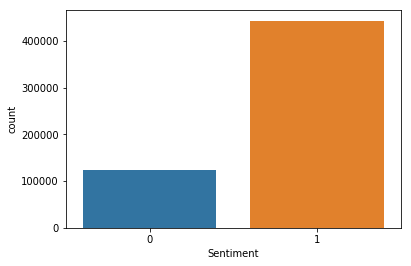

In [13]:
print(df['Sentiment'].value_counts())
sns.countplot(x='Sentiment', data=df)

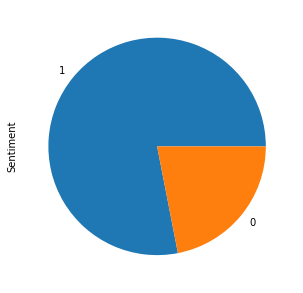

In [15]:
df['Sentiment'].value_counts().plot.pie(figsize=(5, 5))

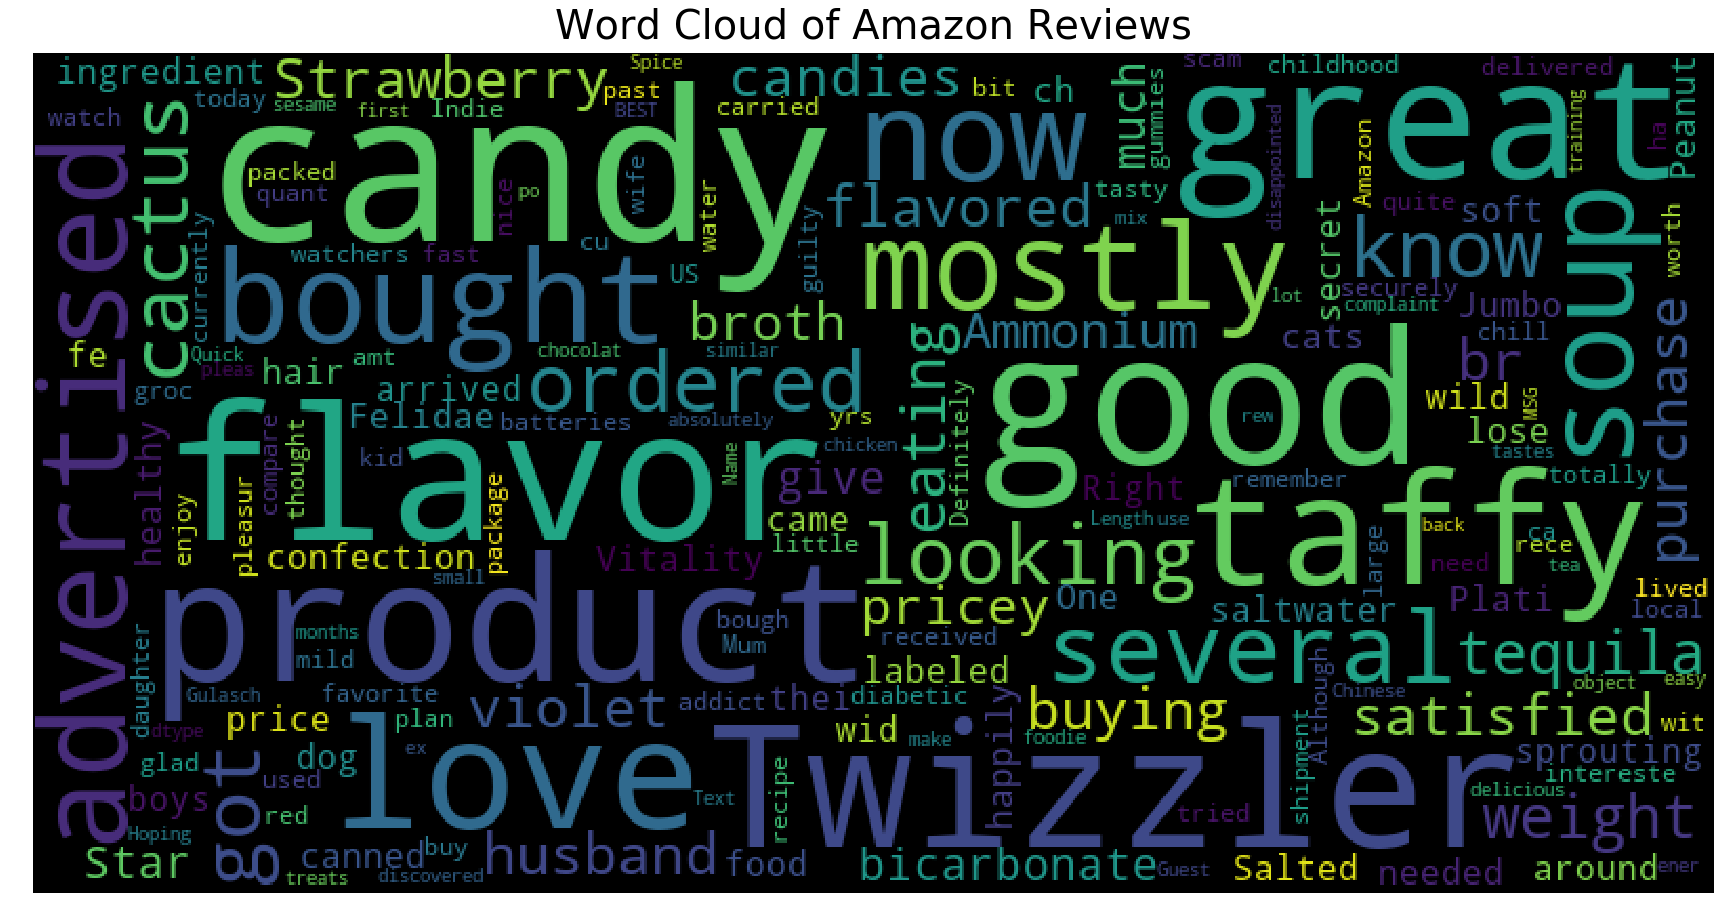

In [16]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df['Text'], title="Word Cloud of Amazon Reviews")

In [18]:
# https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc
import string

## Number of words in the text ##
df["num_words"] = df["Text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
df["num_unique_words"] = df["Text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
df["num_chars"] = df["Text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
df["num_stopwords"] = df["Text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
df["num_punctuations"] = df['Text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Average length of the words in the text ##
df["mean_word_len"] = df["Text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [23]:
## Truncate some extreme values for better visuals ##
df['num_words'].loc[df['num_words']>1000] = 1000 
df['num_punctuations'].loc[df['num_punctuations']>500] = 500
df['num_chars'].loc[df['num_chars']>10000] = 10000

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


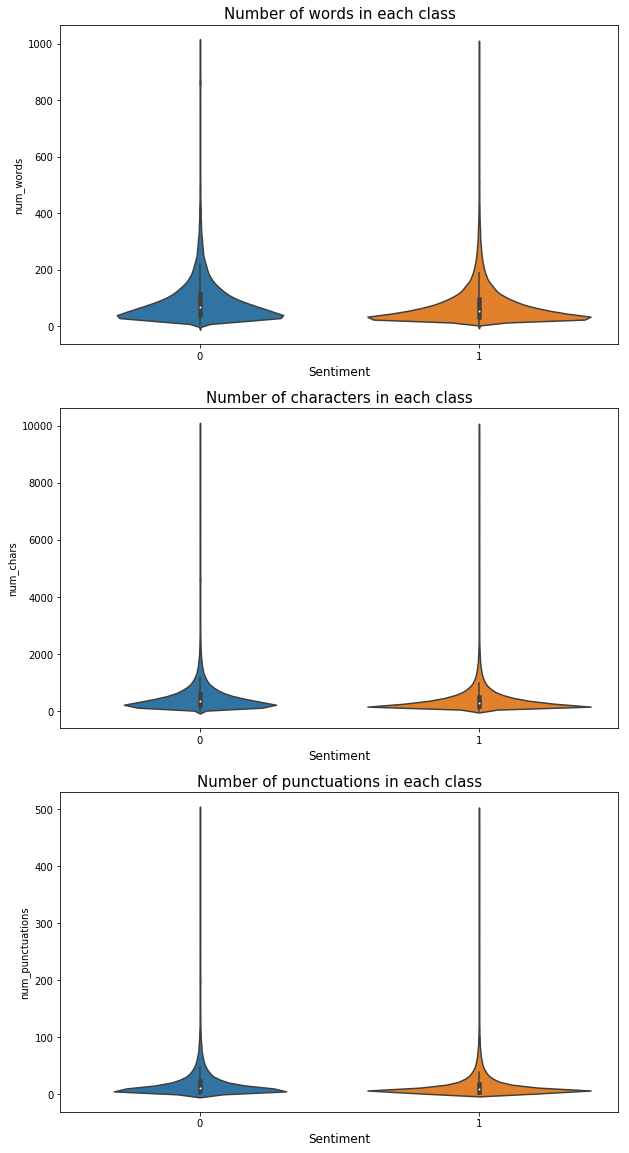

In [24]:
f, axes = plt.subplots(3, 1, figsize=(10,20))
sns.violinplot(x='Sentiment', y='num_words', data=df, ax=axes[0])
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.violinplot(x='Sentiment', y='num_chars', data=df, ax=axes[1])
axes[1].set_xlabel('Sentiment', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.violinplot(x='Sentiment', y='num_punctuations', data=df, ax=axes[2])
axes[2].set_xlabel('Sentiment', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)
plt.show()

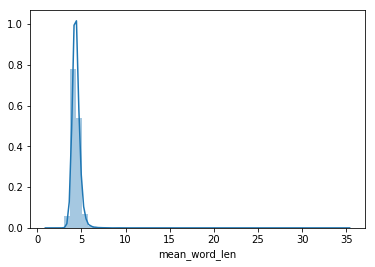

<Figure size 720x1440 with 0 Axes>

In [30]:
sns.distplot(df['mean_word_len'])
plt.figure(figsize=(10,20))
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)

(454763,)
(113691,)


## Baseline Model

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [34]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)

word_vectorizer.fit(df['Text'])
train_word_features = word_vectorizer.transform(X_train)
test_word_features = word_vectorizer.transform(X_test)

In [35]:
classifier = LogisticRegression(class_weight = "balanced", C=0.5, solver='sag')
classifier.fit(train_word_features, y_train)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

In [36]:
y_pred = classifier.predict(test_word_features)

In [39]:
y_pred[0:5]

array([1, 1, 0, 0, 1])

In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8651520349016193
